# Harris Corner Detection

In this exercise we are dealing with corner detection using the OpenCV implementation of [Harris Corner Detection](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html) algorithm. Specifically, we are going to make use of the following function.

* [cornerHarris](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345) - runs the Harris Corner Detector. Following parameters are relevant for us.
    * `src` - single channel (grayscale) 8-bit or floating point image.
    * `blockSize` - block size for shifting window, also known as the neighborhood size in which to look for the largest variations in magnitude and directions of Sobel gradients [cornerEigenValsAndVecs](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga4055896d9ef77dd3cacf2c5f60e13f1c).
    * `ksize` - Sobel kernel size.
    * `k` - constant value for the Harris Detector formulation.

We would first practice the same on a less complex chessboard image.

In [68]:
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

In [69]:
# Define function for corner detection. This function returns an array with equal shape 
# with the original image, having intensity values with a spike in intensities at the 
# detected corner points. We select the corner points later on using a appropriate 
# threshold, which we have to according to the detection result.
# The parameter harris_constant corresponds to the constant k in the mathematical 
# formulation of the Harris Corner Detector algorithm. A k value of 0.04 is standard 
# value to use.
def detect_corners(gray_img: np.ndarray, block_size: int, kernel_size: int, 
                    harris_constant: float = 0.04) -> np.ndarray:
    """Detects corners using the Harris Corner Detector algorithm"""
    # We convert the image to float in order for the eae of computation
    corners: np.ndarray = cv2.cornerHarris(src=np.float32(gray_img), blockSize=block_size,
                                            ksize=kernel_size, k=harris_constant)
    # Dilate corner image to enhance corner points
    corners = cv2.dilate(corners, kernel=None)
    return corners

In [70]:
# Define function for plotting the corners on the original image
def plot_corners(img: np.ndarray, ref: np.ndarray, thresh: float, 
                color: Tuple[int, int, int] = (255, 0, 0), thickness: int = 2) -> None:
    """Plots the corner points to a copy of the original image"""
    for j in range(0, ref.shape[0]):
        for i in range(0, ref.shape[1]):
            if(ref[j,i] > thresh):
                # image, center pt, radius, color, thickness
                cv2.circle(img=img, center=(i, j), radius=1, 
                            color=color, thickness=thickness)
    plt.imshow(img)

## Start simple with detecting corners in a chessboard image

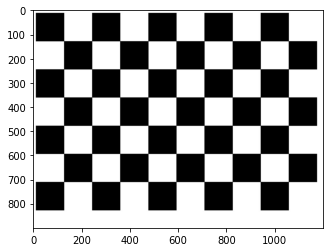

In [71]:
image: np.ndarray = cv2.imread(filename='images/chessboard.jpg')[:900, :1200]
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
image_gray: np.ndarray = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2GRAY)
plt.imshow(image)

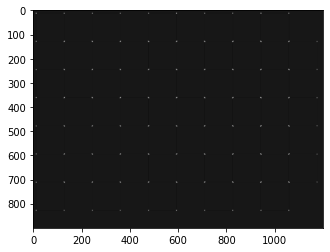

In [72]:
block_size: int = 2 
kernel_size: int = 3 # standard Sobel kernel size
corners: np.ndarray = detect_corners(gray_img=image_gray, block_size=block_size, kernel_size=kernel_size)
thresh: float = 0.1 * np.max(corners)
# We plot the corners array to understand, which spikes in the intensity have been detected by the Harris 
# Corner Detector algorithm.
plt.imshow(corners, cmap='gray')

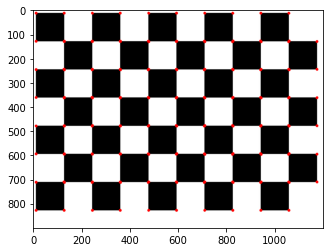

In [73]:
# At now plotting the corners points on the original image
plot_corners(img=np.copy(image), ref=corners, thresh=thresh, thickness=5)

We have detected corners in all places apart from the ones, where there is no strong change in intensities are taking place e.g., top right and bottom right corners. This time our chosen threshold was quite accurate to detect all the corners. Also it was easy as the image itself is quite homogeneous and balanced.

## Image with less homogeneity in it

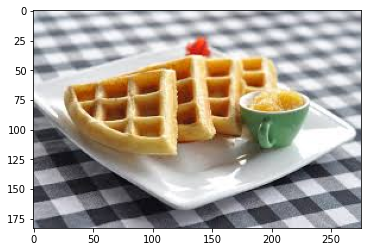

In [74]:
image: np.ndarray = cv2.imread(filename='images/waffle.jpg')
image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2RGB)
image_gray: np.ndarray = cv2.cvtColor(src=image, code=cv2.COLOR_RGB2GRAY)
plt.imshow(image)

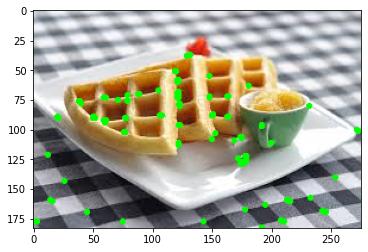

In [75]:
block_size: int = 2 
kernel_size: int = 3 # standard Sobel kernel size
corners: np.ndarray = detect_corners(gray_img=image_gray, block_size=block_size, kernel_size=kernel_size)
thresh: float = 0.1 * np.max(corners)
plot_corners(img=np.copy(image), ref=corners, thresh=thresh, color=(0, 255, 0), thickness=1)

This time we have missed some corners. We could try a different threshold.

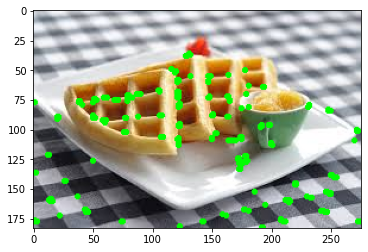

In [87]:
block_size: int = 2 
kernel_size: int = 3 # standard Sobel kernel size
corners: np.ndarray = detect_corners(gray_img=image_gray, block_size=block_size, kernel_size=kernel_size)
thresh: float = 0.05 * np.max(corners)
plot_corners(img=np.copy(image), ref=corners, thresh=thresh, color=(0, 255, 0), thickness=1)